In [1]:
import pandas as pd
import os

# Set path to your FAERS Q4 2024 files
path = r"C:\Users\Abhay Agnihotri\Documents\FAERS\2024Q4"

# List all files to confirm correct path
print("📁 Files in folder:")
print(os.listdir(path))

# Define a custom function to read FAERS $-delimited files
def read_faers_file(filename):
    return pd.read_csv(os.path.join(path, filename), sep="$", encoding="utf-8", low_memory=False)

# Load each file
demo = read_faers_file("DEMO24Q4.txt")
drug = read_faers_file("DRUG24Q4.txt")
reac = read_faers_file("REAC24Q4.txt")
outc = read_faers_file("OUTC24Q4.txt")
ther = read_faers_file("THER24Q4.txt")
rpsr = read_faers_file("RPSR24Q4.txt")
indi = read_faers_file("INDI24Q4.txt")

# Preview each file
print("✅ DEMO:")
print(demo.head())

print("✅ DRUG:")
print(drug.head())

print("✅ REAC:")
print(reac.head())


📁 Files in folder:
['.ipynb_checkpoints', 'DEMO24Q4.txt', 'DRUG24Q4.txt', 'faers_2024Q4_merged.csv', 'faers_setup.ipynb.ipynb', 'INDI24Q4.txt', 'OUTC24Q4.txt', 'REAC24Q4.txt', 'RPSR24Q4.txt', 'THER24Q4.txt']
✅ DEMO:
    primaryid    caseid  caseversion i_f_code    event_dt    mfr_dt  \
0   100100247  10010024            7        F  20080501.0  20241104   
1   100373859  10037385            9        F  20120101.0  20241030   
2  1016611044  10166110           44        F  20140430.0  20241129   
3   101735213  10173521            3        F  20140507.0  20241121   
4  1020101730  10201017           30        F  20140428.0  20241112   

   init_fda_dt    fda_dt rept_cod auth_num  ... age_grp sex e_sub    wt  \
0     20140313  20241109      EXP      NaN  ...     NaN   M     Y   NaN   
1     20140326  20241111      EXP      NaN  ...       E   F     Y  64.3   
2     20140512  20241204      EXP      NaN  ...       A   F     Y   NaN   
3     20140515  20241217      EXP      NaN  ...       T  

In [2]:
print("DEMO columns:", demo.columns.tolist())
print("DRUG columns:", drug.columns.tolist())
print("REAC columns:", reac.columns.tolist())


DEMO columns: ['primaryid', 'caseid', 'caseversion', 'i_f_code', 'event_dt', 'mfr_dt', 'init_fda_dt', 'fda_dt', 'rept_cod', 'auth_num', 'mfr_num', 'mfr_sndr', 'lit_ref', 'age', 'age_cod', 'age_grp', 'sex', 'e_sub', 'wt', 'wt_cod', 'rept_dt', 'to_mfr', 'occp_cod', 'reporter_country', 'occr_country']
DRUG columns: ['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai', 'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt', 'dose_unit', 'dose_form', 'dose_freq']
REAC columns: ['primaryid', 'caseid', 'pt', 'drug_rec_act']


In [3]:
# Keep only Primary Suspect (PS) and Secondary Suspect (SS) drugs
drug_filtered = drug[drug['role_cod'].isin(['PS', 'SS'])]

print("✅ Suspected drugs only:", drug_filtered.shape)


✅ Suspected drugs only: (1297025, 20)


In [4]:
# Step 1: Downsample DRUG and REAC first (e.g., first 500k rows)
drug_sample = drug_filtered.sample(n=500_000, random_state=42)
reac_sample = reac.sample(n=500_000, random_state=42)

# Step 2: Merge with DEMO
demo_drug = pd.merge(demo, drug_sample, on="primaryid", how="inner")
merged = pd.merge(demo_drug, reac_sample, on="primaryid", how="inner")

print("✅ Merged shape (downsampled):", merged.shape)

✅ Merged shape (downsampled): (2778602, 47)


In [5]:
# Merge DEMO + DRUG on primaryid
demo_drug = pd.merge(demo, drug_filtered, on="primaryid", how="inner")

# Merge that with REAC on primaryid
merged = pd.merge(demo_drug, reac, on="primaryid", how="inner")

print("✅ Merged shape:", merged.shape)
merged.head()

✅ Merged shape: (21228676, 47)


,primaryid,caseid_x,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,caseid,pt,drug_rec_act
0,100100247,10010024,7,F,20080501.0,20241104,20140313,20241109,EXP,NaN,...,Not Available,NaN,125057,40.0,MG,NaN,QOW,10010024,Malignant melanoma stage I,NaN
1,100100247,10010024,7,F,20080501.0,20241104,20140313,20241109,EXP,NaN,...,Not Available,NaN,125057,40.0,MG,NaN,QOW,10010024,Keratoacanthoma,NaN
2,100100247,10010024,7,F,20080501.0,20241104,20140313,20241109,EXP,NaN,...,Not Available,NaN,125057,40.0,MG,NaN,QOW,10010024,Blood pressure increased,NaN
3,100100247,10010024,7,F,20080501.0,20241104,20140313,20241109,EXP,NaN,...,Not Available,NaN,125057,40.0,MG,NaN,QOW,10010024,Keratoacanthoma,NaN
4,100100247,10010024,7,F,20080501.0,20241104,20140313,20241109,EXP,NaN,...,Not Available,NaN,125057,40.0,MG,NaN,QOW,10010024,Hyperkeratosis,NaN


In [6]:
print("Top 10 Drugs:")
print(merged['drugname'].value_counts().head(10))

print("\nTop 10 Reactions:")
print(merged['pt'].value_counts().head(10))


Top 10 Drugs:
drugname
METHOTREXATE                837601
ACTEMRA                     802708
SULFASALAZINE               598979
PREDNISONE                  590118
INFLECTRA                   583681
RITUXIMAB                   466404
FOLIC ACID                  448203
DESOXIMETASONE              406562
ORENCIA                     402233
CETIRIZINE HYDROCHLORIDE    325477
Name: count, dtype: int64

Top 10 Reactions:
pt
Off label use           376954
Drug ineffective        219885
Fatigue                 212295
Pain                    185855
Condition aggravated    182061
Nausea                  181296
Headache                179624
Rash                    160265
Dyspnoea                156847
Arthralgia              154846
Name: count, dtype: int64


In [7]:
# Save to CSV to avoid repeating merge each time
merged.to_csv("faers_2024Q4_merged.csv", index=False, encoding="utf-8")
print("✅ Merged data saved.")


✅ Merged data saved.


In [8]:
# Load outcome file
outc = read_faers_file("OUTC24Q4.txt")

# See structure
print(outc.head())
print("OUTCOME columns:", outc.columns.tolist())
print(outc['outc_cod'].value_counts())


    primaryid    caseid outc_cod
0   100100247  10010024       OT
1   100373859  10037385       DS
2   100373859  10037385       OT
3  1016611044  10166110       HO
4  1016611044  10166110       OT
OUTCOME columns: ['primaryid', 'caseid', 'outc_cod']
outc_cod
OT    168894
HO     85821
DE     30989
LT     13670
DS      6277
RI      2102
CA      1207
Name: count, dtype: int64


In [9]:
# Only keep minimal columns needed
demo = demo[['primaryid', 'age', 'sex']]
drug = drug[['primaryid', 'drugname', 'role_cod']]
reac = reac[['primaryid', 'pt']]
outc = outc[['primaryid', 'outc_cod']]

# Optional: Only keep rows with valid drugs and reactions
drug = drug[drug['role_cod'].isin(['PS', 'SS'])]  # Primary/Secondary suspects

# Define serious codes
serious_codes = ['DE', 'LT', 'HO', 'DS', 'CA', 'RI']
outc['serious'] = outc['outc_cod'].isin(serious_codes).astype(int)

# Keep only max seriousness flag for each patient
outcome_flags = outc.groupby('primaryid')['serious'].max().reset_index()


In [10]:
# Merge only necessary
merged = pd.merge(demo, drug, on="primaryid", how="inner")
merged = pd.merge(merged, reac, on="primaryid", how="inner")
merged_labeled = pd.merge(merged, outcome_flags, on="primaryid", how="left")
merged_labeled['serious'] = merged_labeled['serious'].fillna(0).astype(int)

print("✅ Final dataset shape:", merged_labeled.shape)


✅ Final dataset shape: (21228676, 7)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy to avoid modifying original
df = merged_labeled.copy()

# Drop rows with missing values in critical columns
df = df.dropna(subset=['age', 'sex', 'drugname', 'pt'])

# Encode categorical variables
le_sex = LabelEncoder()
df['sex_enc'] = le_sex.fit_transform(df['sex'])

le_drug = LabelEncoder()
df['drug_enc'] = le_drug.fit_transform(df['drugname'])

le_pt = LabelEncoder()
df['pt_enc'] = le_pt.fit_transform(df['pt'])

# Final feature set and target
X = df[['age', 'sex_enc', 'drug_enc', 'pt_enc']]
y = df['serious']

# Optional: Sample for quick training (use full later)
X_sample, _, y_sample, _ = train_test_split(X, y, stratify=y, train_size=50000, random_state=42)

print("✅ Sample prepared:", X_sample.shape)


✅ Sample prepared: (50000, 4)


✅ Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.49      0.64      8679
           1       0.90      0.99      0.94     41321

    accuracy                           0.90     50000
   macro avg       0.91      0.74      0.79     50000
weighted avg       0.91      0.90      0.89     50000



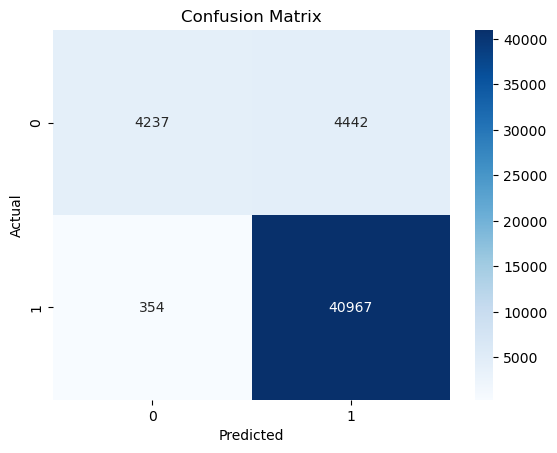

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_sample, y_sample)

# Predict on training set (for now)
y_pred = clf.predict(X_sample)

# Show performance
print("✅ Classification Report:")
print(classification_report(y_sample, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_sample, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


100%|===================| 99852/100000 [10:09<00:00]        

<Figure size 640x480 with 0 Axes>

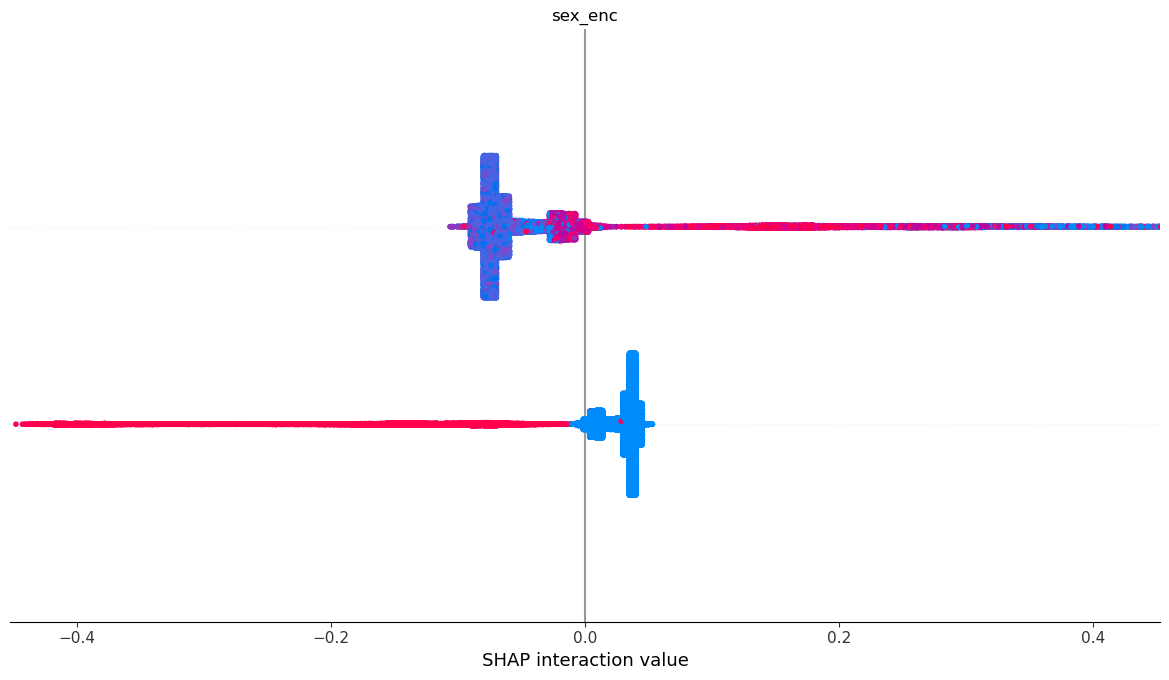

In [13]:
import shap

# Use TreeExplainer for RandomForest
explainer = shap.Explainer(clf, X_sample)
shap_values = explainer(X_sample)

# Summary Plot
shap.summary_plot(shap_values, X_sample)


In [14]:
# Your final merged dataset
merged_labeled.head()


,primaryid,age,sex,drugname,role_cod,pt,serious
0,100100247,56.0,M,ADALIMUMAB,PS,Malignant melanoma stage I,0
1,100100247,56.0,M,ADALIMUMAB,PS,Keratoacanthoma,0
2,100100247,56.0,M,ADALIMUMAB,PS,Blood pressure increased,0
3,100100247,56.0,M,ADALIMUMAB,PS,Keratoacanthoma,0
4,100100247,56.0,M,ADALIMUMAB,PS,Hyperkeratosis,0


In [15]:
# Define your features and target
X = merged_labeled.drop(columns=["serious", "primaryid", ])  # drop target + identifiers
y = merged_labeled["serious"]


In [16]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
!pip install xgboost


In [19]:
!conda install -c conda-forge xgboost -y


Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Abhay Agnihotri\anaconda3\envs\jader_env

  added / updated specs:
    - xgboost


The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main/win-64::certifi-2025.7.14-p~ --> conda-forge/noarch::certifi-2025.7.14-pyhd8ed1ab_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [23]:
import xgboost as xgb

model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    eval_metric='logloss'
)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [21]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    min_child_weight=3,
    use_label_encoder=False,
    eval_metric="logloss"
)


In [24]:
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

✅ Accuracy: 0.8759359979047213

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.54      0.62    803110
           1       0.90      0.95      0.93   3442626

    accuracy                           0.88   4245736
   macro avg       0.82      0.75      0.77   4245736
weighted avg       0.87      0.88      0.87   4245736



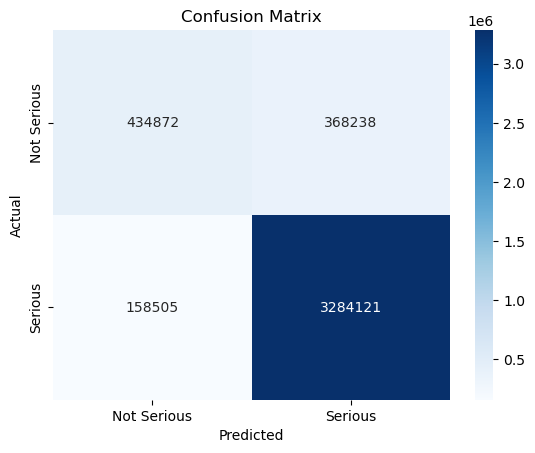

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Serious", "Serious"], yticklabels=["Not Serious", "Serious"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


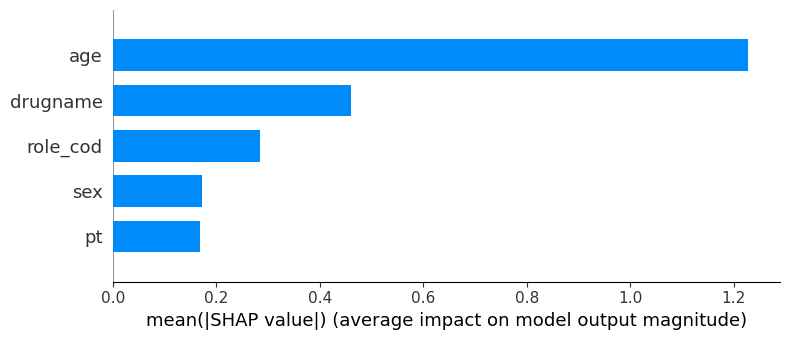

In [27]:
import shap

# Create TreeExplainer and get SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot with better visualization
shap.summary_plot(shap_values, X_test, max_display=15, plot_type="bar")


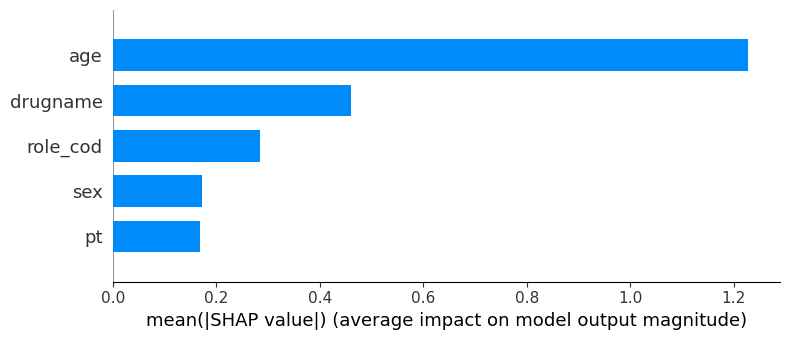

In [28]:
plt.figure()
shap.summary_plot(shap_values, X_test, max_display=15, plot_type="bar", show=False)
plt.savefig("shap_summary_plot.png", dpi=300)


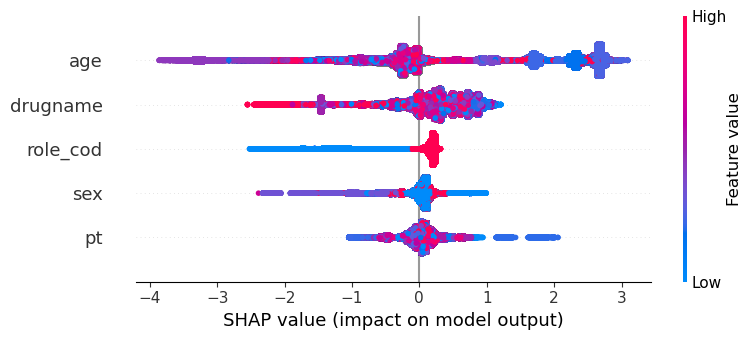

In [29]:
shap.summary_plot(shap_values, X_test, max_display=10)


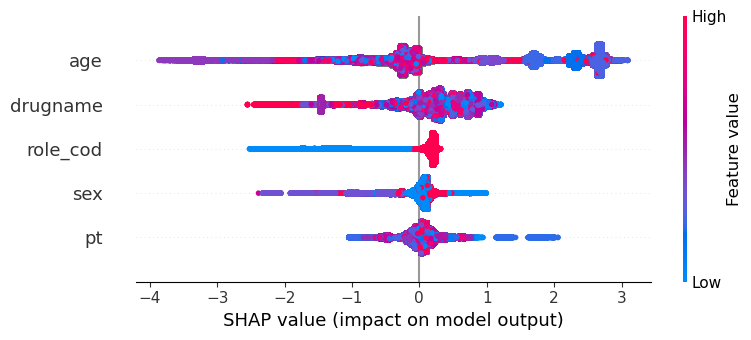

In [30]:
plt.figure()
shap.summary_plot(shap_values, X_test, max_display=10, show=False)
plt.savefig("shap_summary_bar.png", dpi=300)
